<a href="https://colab.research.google.com/github/hoatuyet423/fraud-prediction-accenture2b/blob/main/fraud_prediction_accenture2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This is the AI Studio Project hosted by Accenture under the program Break Through Tech AI at UCLA

Team members: Jenny Quach, Zahra Iranmanesh, Melody Yu, Veronica Salas, Sabahat Dawar

Challenge Advisors: Rachel Cabrera, Brendon T. Ngo


#Importing Data


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Read and Investigate Data

Done:
- Read data from local google colb files
- Investigate the dimension and some of the basic data using shape and head
- Check for the types of the data


In [ ]:
url_train_identity = 'https://github.com/hoatuyet423/fraud-prediction-accenture2b/raw/main/train_identity.csv'
train_identity = pd.read_csv(url_train_identity)

#train_identity = pd.read_csv('/train_identity.csv')
train_identity.head(100)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2987390,0.0,60309.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,safari generic,24.0,1280x800,match_status:2,T,T,T,T,desktop,MacOS
96,2987398,0.0,228519.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 62.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,LG-K500 Build/MMB29M
97,2987404,-5.0,78125.0,NaN,NaN,1.0,-1.0,NaN,NaN,NaN,...,mobile safari 10.0,32.0,2208x1242,match_status:1,T,F,F,T,mobile,iOS Device
98,2987405,-20.0,550210.0,NaN,NaN,0.0,-1.0,NaN,NaN,NaN,...,mobile safari 11.0,NaN,NaN,NaN,F,F,F,T,mobile,NaN


In [ ]:
train_identity.shape

(144233, 41)

In [ ]:
url_train_transaction = 'https://github.com/hoatuyet423/fraud-prediction-accenture2b/raw/main/train_transaction%20copy.csv'
train_transaction = pd.read_csv(url_train_transaction)

train_transaction.head(100)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2987095,0,88120,59.0,W,2538,476.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2987096,0,88131,108.5,W,15121,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,2987097,0,88147,21.5,W,2581,199.0,150.0,mastercard,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2987098,0,88149,159.0,W,6459,100.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_transaction.shape

(590540, 394)

In [ ]:
train_identity.dtypes

TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34             object
id_35             object
id_36             object
id_37             object
id_38             object
DeviceType        object


In [ ]:
train_transaction.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 394, dtype: object

In [ ]:
train_identity.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [ ]:
train_transaction.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [ ]:
# combine train_transaction and train_identity by TransactionID
train_df = train_transaction.merge(train_identity, on = 'TransactionID', how='outer')
train_df.shape

(590540, 434)

In [ ]:
train_df.head(100)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2987095,0,88120,59.0,W,2538,476.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2987096,0,88131,108.5,W,15121,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,2987097,0,88147,21.5,W,2581,199.0,150.0,mastercard,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2987098,0,88149,159.0,W,6459,100.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


PyTorch

Use Pytorch to run the data in batch instead of everything at once


In [ ]:
# training_data = datasets.FashionMNIST(
#     root="data",
#     train=True,
#     download=True,
#     transform=ToTensor()
# )

Observation: If transaction amount is too big or too little (min for transaction is 99 cents) then it might be a potential fraud

Plan: ?

In [ ]:
fraudData = train_df.loc[train_df['isFraud']==1]

fraudData


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
245,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
288,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,chrome 62.0 for ios,NaN,NaN,NaN,F,F,F,F,mobile,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590361,3577361,1,15807368,1224.000,W,3278,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590364,3577364,1,15807516,69.964,C,5812,408.0,185.0,mastercard,224.0,...,samsung browser 6.4,NaN,NaN,NaN,F,F,T,F,mobile,SAMSUNG SM-J700M Build/MMB29K
590368,3577368,1,15807677,100.000,H,6758,399.0,150.0,american express,146.0,...,mobile safari 11.0,32.0,2208x1242,match_status:1,T,F,F,T,mobile,iOS Device
590372,3577372,1,15807758,117.000,W,14037,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sample_train_df = train_df[100 : 500]

# Features with vague names


In [ ]:
# id_columns = [f"id_{i}" for i in range(10,39) ]
# for x in id_columns:
#   train_df.drop(x, inplace=True, axis=1)
id_colnames = [x for x in sample_train_df if "id" in x ]
for x in id_colnames:
    sample_train_df.drop(x, inplace=True, axis=1)
sample_train_df.shape

<ipython-input-21-2cc31aa3c236>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_train_df.drop(x, inplace=True, axis=1)
<ipython-input-21-2cc31aa3c236>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_train_df.drop(x, inplace=True, axis=1)
<ipython-input-21-2cc31aa3c236>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_train_df.drop(x, inplace=True, axis=1)
<ipython-input-21-2cc31aa3c236>:6: SettingWithCopyWarning:

(400, 396)

In [ ]:
sample_train_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V332,V333,V334,V335,V336,V337,V338,V339,DeviceType,DeviceInfo
100,2987100,0,88169,100.000,H,16659,170.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mobile,SM-G930V Build/NRD90M
101,2987101,0,88174,25.000,H,4523,423.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,desktop,MacOS
102,2987102,0,88178,42.950,W,4186,446.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,2987103,0,88184,47.950,W,18370,547.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,2987104,0,88208,100.000,H,16659,170.0,150.0,visa,226.0,...,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,mobile,SM-G930V Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2987495,0,94795,250.000,W,8394,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,2987496,0,94803,107.950,W,17129,321.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,2987497,0,94829,39.000,W,12686,215.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,2987498,0,94851,100.000,W,7377,555.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# V_colnames = [x for x in train_df if "V" in x ]
# for x in V_colnames:
#     train_df.drop(x, inplace=True, axis=1)
# train_df.shape

In [ ]:
#train_df.head(100)

# Missing Data

Observation: We observe that there is a lot of missing values in train_identity and train_transaction so we think that we should drop the columns with too much missing data as those might not be relevant or useful to us.

Plan: We are planning to have a for loop to loop through the number if missing data in each columns and drop the columns that have more than 130k missing data for the train_transaction and more than 50k for the train_identity


In [ ]:
sample_train_df.isnull().sum()

TransactionID       0
isFraud             0
TransactionDT       0
TransactionAmt      0
ProductCD           0
                 ... 
V337              331
V338              331
V339              331
DeviceType        291
DeviceInfo        304
Length: 396, dtype: int64

In [ ]:
threshold = len(sample_train_df)/90
nan_count = np.sum(sample_train_df.isnull(), axis = 0)
to_impute_cols = sample_train_df.columns[nan_count > threshold]
for x in to_impute_cols:
    sample_train_df.drop(x, inplace=True, axis=1)
sample_train_df.shape


<ipython-input-26-85db20a4d8ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_train_df.drop(x, inplace=True, axis=1)
<ipython-input-26-85db20a4d8ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_train_df.drop(x, inplace=True, axis=1)
<ipython-input-26-85db20a4d8ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_train_df.drop(x, inplace=True, axis=1)
<ipython-input-26-85db20a4d8ad>:5: SettingWithCopyWarning:

(400, 111)

In [ ]:
sample_train_df.isnull().sum()

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
                 ..
V317              0
V318              0
V319              0
V320              0
V321              0
Length: 111, dtype: int64


As we removed all the columns with more than 90% missing values, we will now resolved the rest of the columns with missing values by replacing them with mean values


In [ ]:
nan_detected = np.sum(sample_train_df.isnull(), axis = 0) != 0
is_int_or_float = (sample_train_df.dtypes == 'int64') | (sample_train_df.dtypes == 'float64')
mean_replaced_cols = sample_train_df.columns[nan_detected & is_int_or_float]

# for colname in mean_replaced_cols:
#     train_df[colname+"_na"] = train_df[colname].isnull()

for colname in mean_replaced_cols:
    sample_train_df[colname].fillna(value=train_df[colname].mean(), inplace=True)

sample_train_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card3,card4,card5,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
100,2987100,0,88169,100.000,H,16659,150.0,visa,226.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,2987101,0,88174,25.000,H,4523,150.0,visa,226.0,debit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,2987102,0,88178,42.950,W,4186,150.0,visa,226.0,debit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,2987103,0,88184,47.950,W,18370,150.0,visa,226.0,debit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,2987104,0,88208,100.000,H,16659,150.0,visa,226.0,credit,...,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2987495,0,94795,250.000,W,8394,150.0,visa,226.0,debit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,2987496,0,94803,107.950,W,17129,150.0,visa,226.0,debit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,2987497,0,94829,39.000,W,12686,150.0,visa,226.0,debit,...,0.0,0.0,0.0,0.0,0.0,39.0,39.0,0.0,0.0,0.0
498,2987498,0,94851,100.000,W,7377,150.0,mastercard,117.0,debit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sample_train_df.isnull().sum()

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
                 ..
V317              0
V318              0
V319              0
V320              0
V321              0
Length: 111, dtype: int64

So as we replaced all the missing values in the numerical columns with their mean values, we can now work toward the missing values in non-numerical columns and can use one hot encoding to transfer them into numerical values. We will first figure out which columns that need to use one hot encoding


In [ ]:
is_int_or_float_or_bool = (sample_train_df.dtypes == 'int64') | (sample_train_df.dtypes == 'float64') | (sample_train_df.dtypes == bool)
sample_train_df.columns[is_int_or_float_or_bool == False]

Index(['ProductCD', 'card4', 'card6'], dtype='object')

Now we know that there is 3 columns that can be transfer into one-hot-encoding that is ProductCD, card4, and card6


In [ ]:
columns_to_encode = ['ProductCD', 'card4', 'card6']
for col in columns_to_encode:
  one_hot_encoded = pd.get_dummies(sample_train_df[col], prefix = col)
  sample_train_df = pd.concat([sample_train_df, one_hot_encoded], axis = 1)
  sample_train_df.drop(col, axis = 1, inplace=True)

In [ ]:
sample_train_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card3,card5,C1,C2,C3,...,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit
100,2987100,0,88169,100.000,16659,150.0,226.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,1,1,0
101,2987101,0,88174,25.000,4523,150.0,226.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,1,0,1
102,2987102,0,88178,42.950,4186,150.0,226.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,1,0,1
103,2987103,0,88184,47.950,18370,150.0,226.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,1,0,1
104,2987104,0,88208,100.000,16659,150.0,226.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2987495,0,94795,250.000,8394,150.0,226.0,2.0,1.0,0.0,...,0,0,0,1,0,0,0,1,0,1
496,2987496,0,94803,107.950,17129,150.0,226.0,2.0,2.0,0.0,...,0,0,0,1,0,0,0,1,0,1
497,2987497,0,94829,39.000,12686,150.0,226.0,1.0,2.0,0.0,...,0,0,0,1,0,0,0,1,0,1
498,2987498,0,94851,100.000,7377,150.0,117.0,4.0,1.0,0.0,...,0,0,0,1,0,0,1,0,0,1


We will identify the numeric columns and normalize them by using SkLearn's MinMaxScaler

In [ ]:
# Identifying and normalizing features
from sklearn.preprocessing import MinMaxScaler

# Identify columns of type int64, float64, or bool
is_int_or_float_or_bool = (sample_train_df.dtypes == 'int64') | (sample_train_df.dtypes == 'float64') | (sample_train_df.dtypes == bool)

# Get the columns that are not of type int64, float64, or bool
non_numeric_cols = sample_train_df.columns[is_int_or_float_or_bool == False]

# Get the columns that are of type int64, float64, or bool
numeric_cols = sample_train_df.columns[is_int_or_float_or_bool]

# Create a Min-Max scaler
scaler = MinMaxScaler()

# Normalize the numeric columns
sample_train_df[numeric_cols] = scaler.fit_transform(sample_train_df[numeric_cols])

In [ ]:
sample_train_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card3,card5,C1,C2,C3,...,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit
100,0.000000,0.0,0.000000,0.030257,0.901012,0.485294,0.925373,0.004878,0.005464,0.0,...,1,0,0,0,0,0,0,1,1,0
101,0.002506,0.0,0.000747,0.006512,0.198901,0.485294,0.925373,0.004878,0.005464,0.0,...,1,0,0,0,0,0,0,1,0,1
102,0.005013,0.0,0.001345,0.012195,0.179404,0.485294,0.925373,0.004878,0.005464,0.0,...,0,0,0,1,0,0,0,1,0,1
103,0.007519,0.0,0.002241,0.013778,1.000000,0.485294,0.925373,0.004878,0.005464,0.0,...,0,0,0,1,0,0,0,1,0,1
104,0.010025,0.0,0.005828,0.030257,0.901012,0.485294,0.925373,0.004878,0.005464,0.0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.989975,0.0,0.990137,0.077748,0.422852,0.485294,0.925373,0.009756,0.005464,0.0,...,0,0,0,1,0,0,0,1,0,1
496,0.992481,0.0,0.991333,0.032774,0.928204,0.485294,0.925373,0.009756,0.010929,0.0,...,0,0,0,1,0,0,0,1,0,1
497,0.994987,0.0,0.995218,0.010944,0.671160,0.485294,0.925373,0.004878,0.010929,0.0,...,0,0,0,1,0,0,0,1,0,1
498,0.997494,0.0,0.998506,0.030257,0.364015,0.485294,0.111940,0.019512,0.005464,0.0,...,0,0,0,1,0,0,1,0,0,1


# Split Labels and Features

In [ ]:
y = sample_train_df["isFraud"]
X = sample_train_df.drop(columns="isFraud")
y = y[:1000]
print(y.loc[y==1])
X.shape

203    1.0
240    1.0
243    1.0
245    1.0
288    1.0
367    1.0
405    1.0
Name: isFraud, dtype: float64


(400, 118)

In [ ]:
print(X[ :100])

     TransactionID  TransactionDT  TransactionAmt     card1     card3  \
100       0.000000       0.000000        0.030257  0.901012  0.485294   
101       0.002506       0.000747        0.006512  0.198901  0.485294   
102       0.005013       0.001345        0.012195  0.179404  0.485294   
103       0.007519       0.002241        0.013778  1.000000  0.485294   
104       0.010025       0.005828        0.030257  0.901012  0.485294   
..             ...            ...             ...       ...       ...   
195       0.238095       0.217573        0.017276  0.943882  0.485294   
196       0.240602       0.218769        0.001332  0.059589  1.000000   
197       0.243108       0.223252        0.019492  0.389991  0.485294   
198       0.245614       0.223252        0.003346  0.104079  0.485294   
199       0.248120       0.223551        0.004756  0.856234  1.000000   

        card5        C1        C2   C3    C4  ...  ProductCD_H  ProductCD_R  \
100  0.925373  0.004878  0.005464  0.0  0.00

# Gradient Boosted Decision Trees (GBDT) model
Check if GBDT performs well with the batch of data, sample_data

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  # Change this to Regressor if you have a regression problem
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbdt_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbdt_model.fit(X_train, y_train)
y_pred = gbdt_model.predict(X_test)

Evaluate the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

Print the results

In [ ]:
print(f"Accuracy: {accuracy:.2f}")

print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(class_report)

Accuracy: 0.97
Confusion Matrix:
[[78  1]
 [ 1  0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        79
         1.0       0.00      0.00      0.00         1

    accuracy                           0.97        80
   macro avg       0.49      0.49      0.49        80
weighted avg       0.97      0.97      0.97        80



Analysis of the GBDT model Results:








 The model does a good job when it comes to class 0.0 (Not fraud). It is very accurate, rarely makes mistakes, and is good at finding instances of this type. However, when it comes to the other type, class 1.0 (Fraud), the model struggles significantly. It often makes mistakes, and it's not very good at recognizing instances of this type.

The reasons for this could be either that there is class imbalance between the fraud (1.0) and not fraud (0.0) classes, making it harder for the model to learn.

# Logistic Regression Model

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [ ]:
def train_test_LR(X_train, y_train, X_test, y_test, c=316):
    '''
    Fit a Linear Regression classifier to the training data X_train, y_train.
    Return the loss and accuracy of resulting predictions on the test set.
    Parameters:
        C = Factor that controls how much regularization is applied to the model.
    '''
    model = LogisticRegression(C=c)

    model.fit(X_train, y_train)

    probability_predictions = model.predict_proba(X_test)

    l_loss = log_loss(y_test, probability_predictions)

    class_label_predictions = model.predict(X_test)

    acc_score = accuracy_score(y_test, class_label_predictions)


    return l_loss, acc_score

In [ ]:
loss, acc = train_test_LR(X_train, y_train, X_test, y_test)
print('Log loss: ' + str(loss))
print('Accuracy: ' + str(acc))

Log loss: 0.08873379037737189
Accuracy: 0.9848484848484849


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cs = [10**i for i in range(-10,10)]
cs

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000]

In [ ]:
ll_cs = []
acc_cs = []
for c in cs:
    # Call train_test_LR() function with training and test data and current value of C
    ll, acc = train_test_LR(X_train, y_train, X_test, y_test, c)

    # Append log loss and accuracy score to respective lists
    ll_cs.append(ll)
    acc_cs.append(acc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

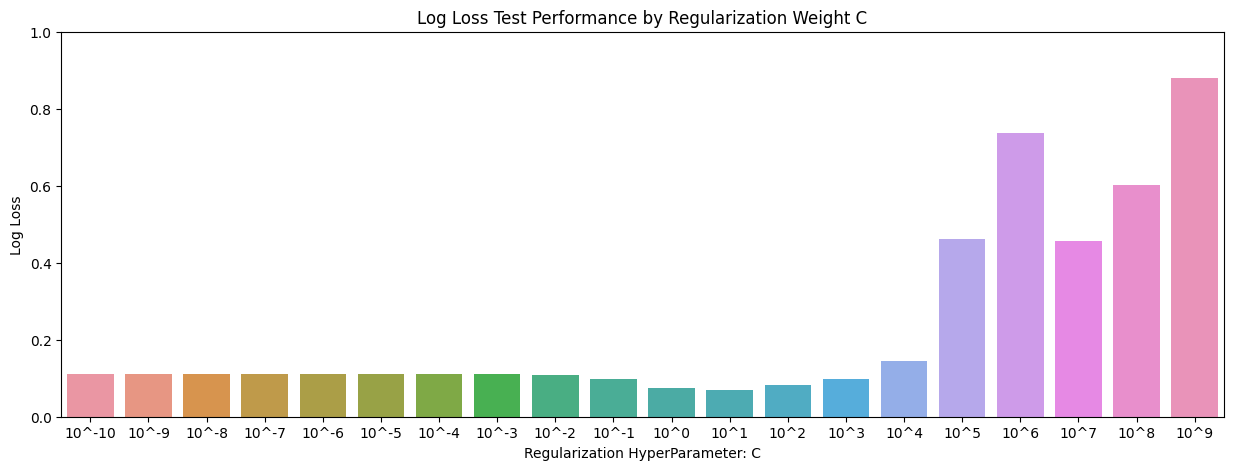

In [ ]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x=cs, y=ll_cs)
g = ax.set_xticklabels([f'10^{i}' for i in range(-10,10)])
ax.set_xlabel('Regularization HyperParameter: C')
ax.set_ylabel('Log Loss')
ax.set_ylim([0, 1])
g = plt.title('Log Loss Test Performance by Regularization Weight C')

We can tell when C = 10, the log loss is the smallest.

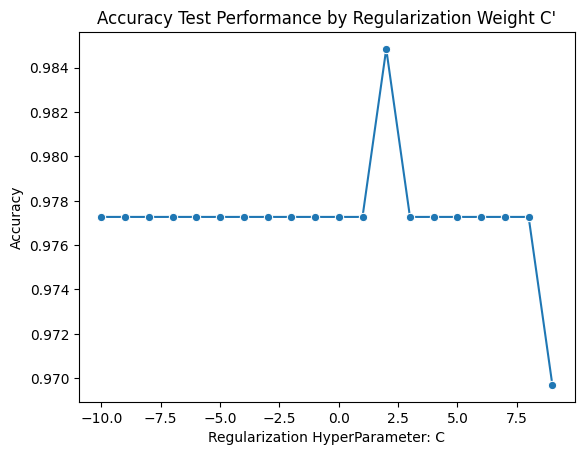

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.log10(cs)

sns.lineplot(x=x, y=acc_cs, marker='o')

plt.title("Accuracy Test Performance by Regularization Weight C'")
plt.xlabel("Regularization HyperParameter: C")
plt.ylabel("Accuracy")
plt.show()

When the exponent of C is around 2.5, the accuracy can reach the max value.

# Naive Bayes Classifier
[insert notes here]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [ ]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Gaussian Naive Bayes model accuracy(in %):", acc*100)

Gaussian Naive Bayes model accuracy(in %): 90.0


400 400
